In [31]:
import json
import numpy as np
import matplotlib.pyplot as plt
file_path = "/home/deep7/hierarchy/Hierarchical-RL/baselines/data/breakout.json"

with open(file_path, 'r') as fp:
    obj = json.load(fp)
    
    

In [32]:
# print(obj)
all_return = []
for tmp_obj in obj:
#     print(tmp_obj)
    try:
        if tmp_obj[u'Agent'] == u'DQN':
            if tmp_obj[u'Iteration'] == 0:
                all_return.append([])
            all_return[-1].append(tmp_obj[u'Value'] )
    except:
        print("no good")
print(np.shape(all_return))

no good
(5, 199)


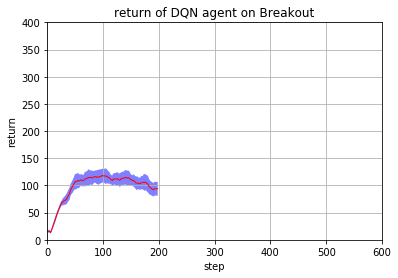

In [40]:
all_return_mean = np.mean(all_return, axis = 0)
all_return_std = np.std(all_return, axis = 0)

N = 10
all_return_mean_smooth = np.convolve(all_return_mean, np.ones((N,))/N, mode='same')
all_return_std_smooth = np.convolve(all_return_std, np.ones((N,))/N, mode='same')

size_of_array = np.shape(all_return_mean)[0]

#fix end
all_return_mean_smooth[size_of_array -N/2 - 2:size_of_array ] = all_return_mean_smooth[-N/2]
all_return_std_smooth[size_of_array -N/2 - 2:size_of_array ] = all_return_std_smooth[-N/2]

#fix beginnign
all_return_mean_smooth[0 : N/2 +1 ] = all_return_mean_smooth[N/2 + 2]
all_return_std_smooth[0 : N/2 +1 ] = all_return_std_smooth[N/2 + 2]



t = range(np.shape(all_return_mean)[0])
fig, ax = plt.subplots(1)
ax.plot(t, all_return_mean_smooth, lw=1, color='red')
ax.fill_between(t, all_return_mean_smooth+all_return_std_smooth, all_return_mean_smooth-all_return_std_smooth, facecolor='blue', alpha=0.5)
ax.set_title('return of DQN agent on Breakout')
ax.set_xlabel('step')
ax.set_ylabel('return')
ax.grid()
ax.set_xlim([0, 600])
ax.set_ylim([0, 400])

fig.savefig('all_return_DOPAMINE.svg')